In [243]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [111]:
# # GOAL: Create a single dataframe containing all shots from season 2000-01 to 2020-21

# # Concatenate all shots to single dataframe
# year1 = 2000
# year2 = str(year1 + 1)[2:]

# # Initialise dataframe
# all_shots = pd.read_csv('./Data/Shots/shots_{0}-{1}_regular_season.csv'.format(year1, year2), index_col=0)

# # Add season column
# all_shots['SEASON ID'] = str(year1) + '-' + year2

# # Iterate seasons 2000-01 up to 2020-21
# while year1 != 2020:

#     # New season years
#     year1 += 1
#     year2 = str(year1 + 1)[2:]
    
#     # Load new season data
#     new_shots = pd.read_csv('./Data/Shots/shots_{0}-{1}_regular_season.csv'.format(year1, year2), index_col=0)

#     # Add new season column
#     new_shots['SEASON ID'] = str(year1) + '-' + year2

#     # Concatenate new data with all data
#     all_shots = pd.concat([all_shots, new_shots], ignore_index=True)

# # Drop unnecessary columns
# all_shots.drop([
#     'GRID_TYPE', 'GAME_EVENT_ID', 'EVENT_TYPE', 'SHOT_ATTEMPTED_FLAG', 'GAME_DATE', 'HTM', 'VTM'],
#     axis=1,
#     inplace=True)

# # Rename columns by removing underscore
# # (e.g. 'GAME_ID' -> 'GAME ID')
# column_names = {}
# for column in all_shots.columns:
#     column_names[column] = ' '.join(column.split('_'))

# all_shots.rename(columns=column_names, inplace=True)

# # Move 'SEASON ID' to first column
# all_shots = all_shots[['SEASON ID'] + [col for col in all_shots.columns if col != 'SEASON ID']]

# # Renaming
# all_shots['SHOT MADE FLAG'].replace({0: False, 1: True}, inplace=True)
# all_shots['SHOT TYPE'].replace({'2PT Field Goal': 2, '3PT Field Goal': 3}, inplace=True)
# all_shots['SHOT ZONE AREA'].replace({
#     'Center(C)': 'Center', 
#     'Left Side Center(LC)': 'Left Side Center', 
#     'Left Side(L)': 'Left Side', 
#     'Right Side(R)': 'Right Side',
#     'Right Side Center(RC)': 'Right Side Center',
#     'Back Court(BC)': 'Back Court'},
#     inplace=True)

# # Save
# all_shots.to_csv('./Data/Shots/all_shots_regular_seasons.csv')

In [129]:
# Load all shots
all_shots = pd.read_csv('./Data/Shots/all_shots_regular_seasons.csv', index_col=0)
all_shots

,SEASON ID,GAME ID,PLAYER ID,PLAYER NAME,TEAM ID,TEAM NAME,PERIOD,MINUTES REMAINING,SECONDS REMAINING,ACTION TYPE,SHOT TYPE,SHOT ZONE BASIC,SHOT ZONE AREA,SHOT ZONE RANGE,SHOT DISTANCE,LOC X,LOC Y,SHOT MADE FLAG
0,2000-01,20000001,84,Latrell Sprewell,1610612752,New York Knicks,1,11,41,Jump Shot,2,In The Paint (Non-RA),Center,Less Than 8 ft.,6,-58,28,False
1,2000-01,20000001,947,Allen Iverson,1610612755,Philadelphia 76ers,1,11,8,Jump Shot,2,Mid-Range,Left Side Center,16-24 ft.,19,-107,167,False
2,2000-01,20000001,275,Allan Houston,1610612752,New York Knicks,1,10,53,Jump Shot,2,Mid-Range,Left Side,8-16 ft.,15,-151,13,False
3,2000-01,20000001,238,Tyrone Hill,1610612755,Philadelphia 76ers,1,10,35,Jump Shot,2,Mid-Range,Left Side,8-16 ft.,9,-94,17,False
4,2000-01,20000001,84,Latrell Sprewell,1610612752,New York Knicks,1,10,19,Jump Shot,2,Mid-Range,Left Side,8-16 ft.,13,-101,95,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155636,2020-21,22001080,1630163,LaMelo Ball,1610612766,Charlotte Hornets,4,0,48,Jump Shot,3,Left Corner 3,Left Side,24+ ft.,23,-234,23,False
4155637,2020-21,22001080,1629060,Rui Hachimura,1610612764,Washington Wizards,4,0,24,Pullup Jump shot,2,Mid-Range,Center,8-16 ft.,15,5,150,False
4155638,2020-21,22001080,201577,Robin Lopez,1610612764,Washington Wizards,4,0,23,Putback Layup Shot,2,Restricted Area,Center,Less Than 8 ft.,0,6,-1,False
4155639,2020-21,22001080,1628984,Devonte' Graham,1610612766,Charlotte Hornets,4,0,13,Jump Shot,3,Above the Break 3,Right Side Center,24+ ft.,25,169,194,False


## About Columns
- 4 periods of twelve minutes each. In case of a tie at the end of the 48 minutes, the teams play extra period(s) of 5 minutes until there is no tie at the end of the 5 minutes. 'PERIOD' column goes up to 8, meaning there have been matches where 4 extra periods have been needed to cancel the tie.
- MINUTES REMAINING from 0 to 12.
- SECONDS REMAINING from 0 to 60.
- ACTION TYPE: the 'style' of the shot (e.g. Hook Shot, Jump Shot, etc.)
- SHOT TYPE: how many points the shot is worth (either 2 or 3)

SHOT LOCATIONS

- 'LOC X', 'LOC Y': X and Y coordinates of shooting location. The location is measured relative to the basket the shot is directed towards. 
    - X goes from -250 to 250 (left and right side of the court). 
    - Y goes from -52 (slightly behind the offensive basket) to 884 (the defensive basket). 
    - https://datavizardry.files.wordpress.com/2020/01/image-4.png  
---
- 'SHOT ZONE BASIC' ranges: 
    - In The Paint (Non-RA): X (-80, 80) --- Y (-52, 138)
    - Mid-Range: X (-220, 220) --- Y (-52, 237)
    - Restricted Area: X (-39, 39) --- Y (-39, 39)
    - Right Corner 3: X (220, 250) --- Y (-51, 87)
    - Above the Break 3: X (-250, 250) --- Y (88, 419)
    - Left Corner 3: X (-250, -220) --- Y (-47, 87)
    - Backcourt: Y (420, 884)

---
 
- 'SHOT ZONE AREA' ranges:
    - Center: X (-128, 128)   
    - Left Side Center: X (-250, 50)
    - Left Side: X (-250, -41)
    - Right Side: X (41, 250)
    - Right Side Center: X (50, 250) 
    - Back Court: Y (398, 884)

---

- 'SHOT ZONE RANGE' / 'SHOT ZONE DISTANCE'   
https://www.harrodsport.com/uploads/wysiwyg/img/basketball-court-dimensions-and-markings-in-feet.png


In [106]:
all_shots.columns

Index(['SEASON ID', 'GAME ID', 'PLAYER ID', 'PLAYER NAME', 'TEAM ID',
       'TEAM NAME', 'PERIOD', 'MINUTES REMAINING', 'SECONDS REMAINING',
       'ACTION TYPE', 'SHOT TYPE', 'SHOT ZONE BASIC', 'SHOT ZONE AREA',
       'SHOT ZONE RANGE', 'SHOT DISTANCE', 'LOC X', 'LOC Y', 'SHOT MADE FLAG'],
      dtype='object')

In [132]:
# Show some info
print('--- TOTALS (FROM SEASON 2000-01 TO 2020-21) ---')
print('SHOTS (=ROWS) :', len(all_shots)) # 4155641
print('SEASONS:', len(all_shots['SEASON ID'].unique())) # 21
print('GAMES:', len(all_shots['GAME ID'].unique())) # 25104
print('PLAYERS:', len(all_shots['PLAYER ID'].unique())) # 2051

print()

print('--- AVERAGES ---')
print('SHOTS PER SEASON:', len(all_shots) // 21) # 197887
print('GAMES PER SEASON:', len(all_shots['GAME ID'].unique()) // 21) # 1195

--- TOTALS (FROM SEASON 2000-01 TO 2020-21) ---
SHOTS (=ROWS) : 4155641
SEASONS: 21
GAMES: 25104
PLAYERS: 2051

--- AVERAGES ---
SHOTS PER SEASON: 197887
GAMES PER SEASON: 1195


# Shots per Season

In [166]:
# GOAL: Get amount of 2PT and 3PT shots in each game
shots_per_game = all_shots.groupby(['GAME ID', 'SHOT TYPE']).size().reset_index(name='COUNT')

# Add season column
shots_per_game = shots_per_game.merge(all_shots[['SEASON ID', 'GAME ID']], on='GAME ID')
# Remove duplicates
shots_per_game = shots_per_game.drop_duplicates().reset_index(drop=True)

shots_per_game.head()

,GAME ID,SHOT TYPE,COUNT,SEASON ID
0,20000001,2,117,2000-01
1,20000001,3,19,2000-01
2,20000002,2,146,2000-01
3,20000002,3,17,2000-01
4,20000003,2,128,2000-01


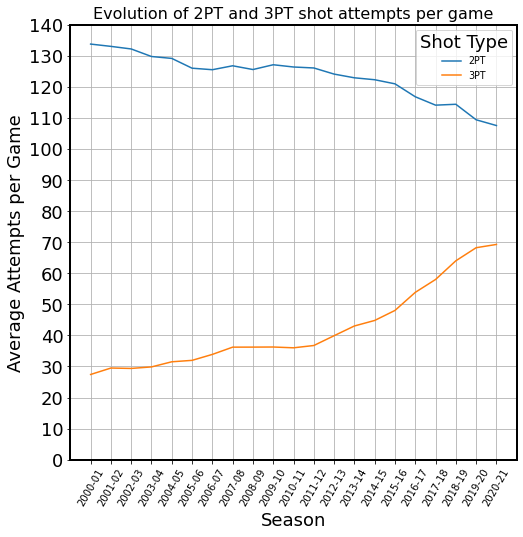

In [286]:
# GOAL: Get average number of 2 and 3 pointers in each game per season
avg_shots_per_game = shots_per_game.groupby(['SHOT TYPE', 'SEASON ID']).mean()
avg_shots_per_game = avg_shots_per_game.reset_index().drop(columns='GAME ID').rename(columns={'COUNT': 'AVG ATTEMPTS PER GAME'})

avg_2pt_per_game = avg_shots_per_game[avg_shots_per_game['SHOT TYPE'] == 2]
avg_3pt_per_game = avg_shots_per_game[avg_shots_per_game['SHOT TYPE'] == 3]

plt.figure(figsize=(8,8))
plt.title('Evolution of 2PT and 3PT shot attempts per game', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Average Attempts per Game')
plt.plot(avg_2pt_per_game['SEASON ID'], avg_2pt_per_game['AVG ATTEMPTS PER GAME'])
plt.plot(avg_3pt_per_game['SEASON ID'], avg_3pt_per_game['AVG ATTEMPTS PER GAME'])
plt.tick_params(axis='x', which='major', labelsize=10, rotation=60)
plt.yticks(np.arange(0,plt.ylim()[1]+10,10))
plt.grid(True)
plt.legend(['2PT', '3PT'], title='Shot Type', loc=1, fontsize=9.5)